In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")


Using TensorFlow backend.


In [2]:
df = pd.read_csv('all.csv')
df =  df.drop(['All','O+','O-','B+','A+','A-','AB+','AB-'], axis=1)
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df.head()

,B-
Date,
2017-01-01,0
2017-01-02,0
2017-01-03,0
2017-01-04,0
2017-01-05,0


In [3]:
df.head()

,B-
Date,
2017-01-01,0
2017-01-02,0
2017-01-03,0
2017-01-04,0
2017-01-05,0


In [4]:
train, test = df[:-4], df[-4:]

In [5]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [6]:
n_input = 4
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [7]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=180)

Epoch 1/180
182/182 [==============================] - 3s 16ms/step - loss: 0.0184
Epoch 2/180
182/182 [==============================] - 2s 11ms/step - loss: 0.0182
Epoch 3/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0181
Epoch 4/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0182
Epoch 5/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0182
Epoch 6/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0181
Epoch 7/180
182/182 [==============================] - 2s 11ms/step - loss: 0.0181
Epoch 8/180
182/182 [==============================] - 3s 15ms/step - loss: 0.0181
Epoch 9/180
182/182 [==============================] - 3s 14ms/step - loss: 0.0181
Epoch 10/180
182/182 [==============================] - 2s 12ms/step - loss: 0.0181
Epoch 11/180
182/182 [==============================] - 2s 13ms/step - loss: 0.0181
Epoch 12/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0181
E

182/182 [==============================] - 2s 10ms/step - loss: 0.0180
Epoch 99/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0180
Epoch 100/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0180
Epoch 101/180
182/182 [==============================] - 2s 11ms/step - loss: 0.0180
Epoch 102/180
182/182 [==============================] - 2s 11ms/step - loss: 0.0180
Epoch 103/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0180
Epoch 104/180
182/182 [==============================] - 2s 11ms/step - loss: 0.0180
Epoch 105/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0180
Epoch 106/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0180
Epoch 107/180
182/182 [==============================] - 3s 16ms/step - loss: 0.0180
Epoch 108/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0179
Epoch 109/180
182/182 [==============================] - 2s 10ms/step - loss: 0.

In [8]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [9]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_predict.head(15)

#df.reset_index(inplace=True)
#df_predict.reset_index(inplace=True)
#df_predict.head(3)

,Prediction
Date,
2020-01-01,0.053820
2020-01-02,0.054117
2020-01-03,0.054265
2020-01-04,0.054354


In [10]:
df.head(12)

,B-
Date,
2017-01-01,0
2017-01-02,0
2017-01-03,0
2017-01-04,0
2017-01-05,0
2017-01-06,0
2017-01-07,0
2017-01-08,0
2017-01-09,0


In [11]:
df_test = pd.concat([df,df_predict], axis=1)

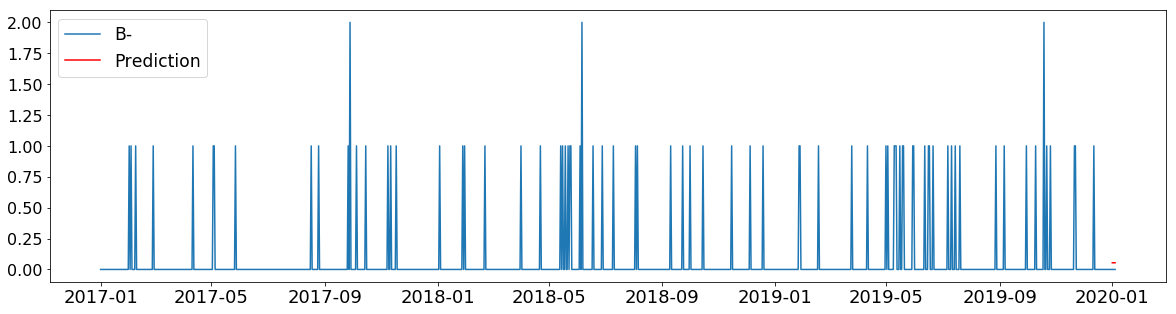

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['B-'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [13]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [0.05413946]


In [14]:
train = df

n_input = 4
n_features = 1

scaler.fit(train)
train = scaler.transform(train)

generator = TimeseriesGenerator(train,train, length=n_input, batch_size=6)

model.fit_generator(generator, epochs=180)

pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:],[[pred_list[i]]], axis = 1)

Epoch 1/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0178
Epoch 2/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0178
Epoch 3/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0178
Epoch 4/180
183/183 [==============================] - 3s 16ms/step - loss: 0.0178
Epoch 5/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0179
Epoch 6/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0178
Epoch 7/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0178
Epoch 8/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0179
Epoch 9/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0178
Epoch 10/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0179
Epoch 11/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0178
Epoch 12/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0177
Ep

Epoch 99/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0177
Epoch 100/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0178
Epoch 101/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0177
Epoch 102/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0178
Epoch 103/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0178
Epoch 104/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0177
Epoch 105/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0178
Epoch 106/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0178
Epoch 107/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0178
Epoch 108/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0178
Epoch 109/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0178
Epoch 110/180
183/183 [==============================] - 2s 10ms/step - los

In [15]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(weeks=x) for x in range(0,5) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)
future_dates

,B-
2020-01-11,NaN
2020-01-18,NaN
2020-01-25,NaN
2020-02-01,NaN


In [16]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)
df_proj.index.name = 'Date'


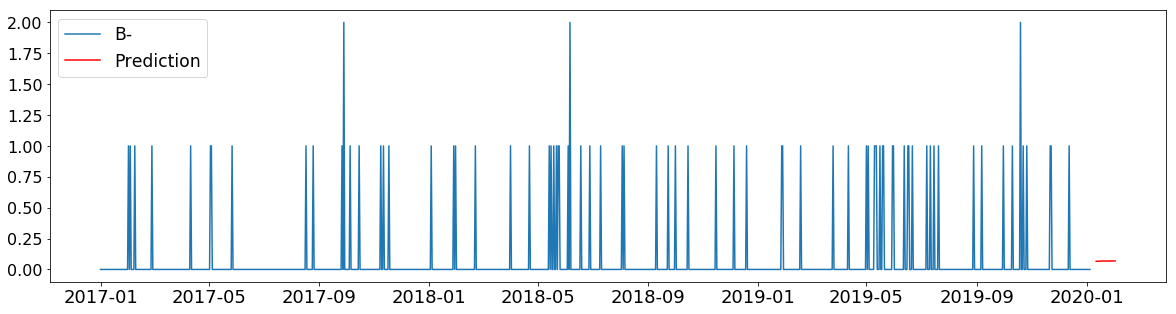

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['B-'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [18]:
print(df_proj)
df_proj.index.name ='Date'
df_proj.reset_index(inplace=True)
print(df_proj)
df_proj['Date'].to_list()

             B-  Prediction
Date                       
2017-01-01  0.0         NaN
2017-01-02  0.0         NaN
2017-01-03  0.0         NaN
2017-01-04  0.0         NaN
2017-01-05  0.0         NaN
2017-01-06  0.0         NaN
2017-01-07  0.0         NaN
2017-01-08  0.0         NaN
2017-01-09  0.0         NaN
2017-01-10  0.0         NaN
2017-01-11  0.0         NaN
2017-01-12  0.0         NaN
2017-01-13  0.0         NaN
2017-01-14  0.0         NaN
2017-01-15  0.0         NaN
2017-01-16  0.0         NaN
2017-01-17  0.0         NaN
2017-01-18  0.0         NaN
2017-01-19  0.0         NaN
2017-01-20  0.0         NaN
2017-01-21  0.0         NaN
2017-01-22  0.0         NaN
2017-01-23  0.0         NaN
2017-01-24  0.0         NaN
2017-01-25  0.0         NaN
2017-01-26  0.0         NaN
2017-01-27  0.0         NaN
2017-01-28  0.0         NaN
2017-01-29  0.0         NaN
2017-01-30  0.0         NaN
...         ...         ...
2019-12-10  0.0         NaN
2019-12-11  0.0         NaN
2019-12-12  1.0     

[Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-02 00:00:00'),
 Timestamp('2017-01-03 00:00:00'),
 Timestamp('2017-01-04 00:00:00'),
 Timestamp('2017-01-05 00:00:00'),
 Timestamp('2017-01-06 00:00:00'),
 Timestamp('2017-01-07 00:00:00'),
 Timestamp('2017-01-08 00:00:00'),
 Timestamp('2017-01-09 00:00:00'),
 Timestamp('2017-01-10 00:00:00'),
 Timestamp('2017-01-11 00:00:00'),
 Timestamp('2017-01-12 00:00:00'),
 Timestamp('2017-01-13 00:00:00'),
 Timestamp('2017-01-14 00:00:00'),
 Timestamp('2017-01-15 00:00:00'),
 Timestamp('2017-01-16 00:00:00'),
 Timestamp('2017-01-17 00:00:00'),
 Timestamp('2017-01-18 00:00:00'),
 Timestamp('2017-01-19 00:00:00'),
 Timestamp('2017-01-20 00:00:00'),
 Timestamp('2017-01-21 00:00:00'),
 Timestamp('2017-01-22 00:00:00'),
 Timestamp('2017-01-23 00:00:00'),
 Timestamp('2017-01-24 00:00:00'),
 Timestamp('2017-01-25 00:00:00'),
 Timestamp('2017-01-26 00:00:00'),
 Timestamp('2017-01-27 00:00:00'),
 Timestamp('2017-01-28 00:00:00'),
 Timestamp('2017-01-

In [19]:
df_proj['Date']=df_proj['Date'].astype(str)
x= df_proj['Date'].to_list()
x[-14:]

['2019-12-26',
 '2019-12-27',
 '2019-12-28',
 '2019-12-29',
 '2019-12-30',
 '2019-12-31',
 '2020-01-01',
 '2020-01-02',
 '2020-01-03',
 '2020-01-04',
 '2020-01-11',
 '2020-01-18',
 '2020-01-25',
 '2020-02-01']

In [20]:
import pickle
pickle.dump(model, open('LSTMTS.pkl','wb'))

In [21]:
model1 = pickle.load(open('LSTMTS.pkl','rb'))
print(df_predict)
#print(model.predict([[294.4631853,269.2113163,259.0677778,801.762786,10,857728.9379,2.31E+08,6.45E+07,-1.58E-04,0.318021887,0.944691378,911.1851229,115.1132337,38754.36871,125.6205738,795.0629418,769.0343165,758.783161,802.5212002,105.7078282,109.0908925,38192.10039,99.75624612,0,0,0.739668222,0.795160951,0.39753938]]))
#print(model.score(X_test,y_test))

            Prediction
2020-01-11    0.065906
2020-01-18    0.067843
2020-01-25    0.068445
2020-02-01    0.068729


In [22]:
import joblib

joblib.dump(scaler, "B-data_transformer.joblib")
model.save("B-model.h5")

In [23]:
from datetime import timedelta, date
EndDate = date.today() + timedelta(days=7)
